### **DATA LOADING**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your file on Google Drive
file_path = "/content/drive/My Drive/merged_tensors_with_labels.csv"

# Copy the file to Colab under the /content directory
!cp "{file_path}" /content

# Load the CSV file into a DataFrame
import pandas as pd
df = pd.read_csv("/content/merged_tensors_with_labels.csv")

# Display the DataFrame
print(df.head())

Mounted at /content/drive
          0         1         2         3         4         5         6  \
0 -0.788955 -0.452171 -0.718902  0.524362  0.407345 -0.054561  0.599061   
1 -0.786391 -0.536763 -0.928366  0.635211  0.677996 -0.164220  0.391323   
2 -0.760979 -0.356124 -0.678704  0.650039  0.453287 -0.208375  0.471421   
3 -0.645143 -0.442135 -0.855603  0.572795  0.629087 -0.262791  0.218573   
4 -0.715979 -0.244338 -0.451217  0.467052  0.265069 -0.223246 -0.013612   

          7         8         9  ...       759       760       761       762  \
0  0.322636 -0.314898 -0.999944  ...  0.029673  0.846054  0.820441  0.263943   
1  0.416578 -0.727519 -0.999947  ... -0.129403  0.900940  0.696012  0.549645   
2  0.159647 -0.395316 -0.999743  ...  0.439547  0.853939  0.784838  0.883011   
3  0.249878 -0.622201 -0.999599  ...  0.541194  0.944661  0.662793  0.681176   
4  0.125522 -0.200415 -0.999057  ...  0.191682  0.713078  0.695555  0.938667   

        763       764       765       766 



---



## **LSTM**

In [ ]:
!pip install tensorflow

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.6780 - loss: 0.5678 - val_accuracy: 0.7793 - val_loss: 0.4627
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.8216 - loss: 0.4053 - val_accuracy: 0.8060 - val_loss: 0.4364
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.8211 - loss: 0.4141 - val_accuracy: 0.8044 - val_loss: 0.4307
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.8269 - loss: 0.4013 - val_accuracy: 0.8019 - val_loss: 0.4517
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.8167 - loss: 0.4210 - val_accuracy: 0.7930 - val_loss: 0.4489
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.8278 - loss: 0.3968 - val_accuracy: 0.8165 - val_loss: 0.4101
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8376 - loss: 0.3863 - val_accuracy: 0.8173 - val_loss: 0.4031
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.8367 - loss: 0.3854 - val_accuracy: 

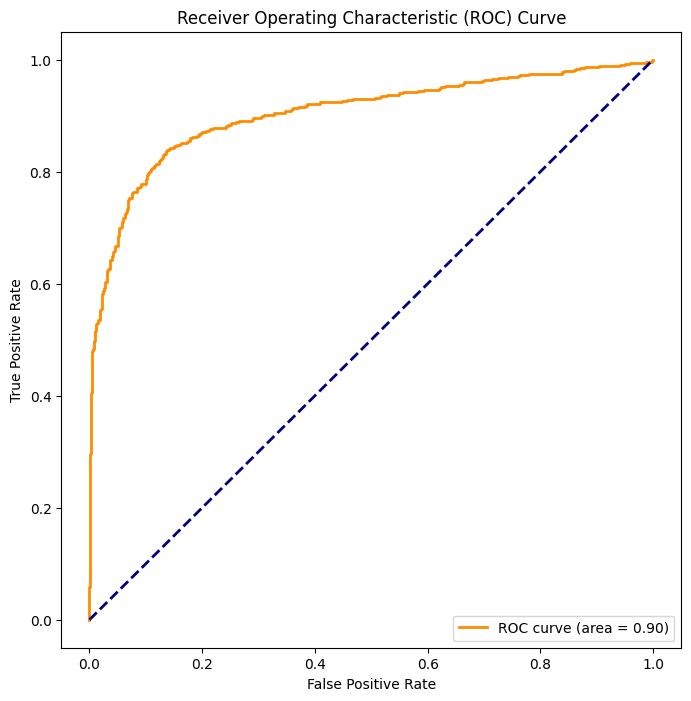

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       783
           1       0.92      0.73      0.81       764

    accuracy                           0.83      1547
   macro avg       0.85      0.83      0.83      1547
weighted avg       0.85      0.83      0.83      1547



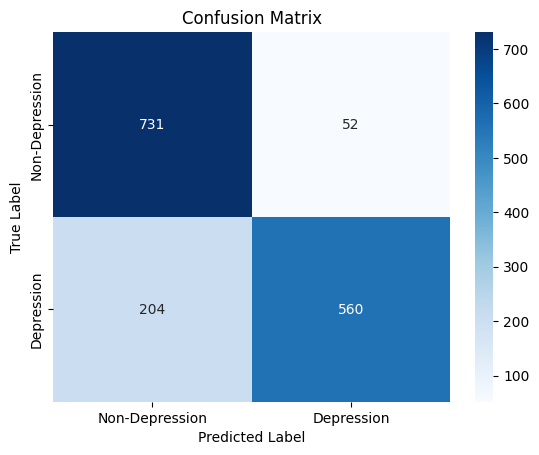

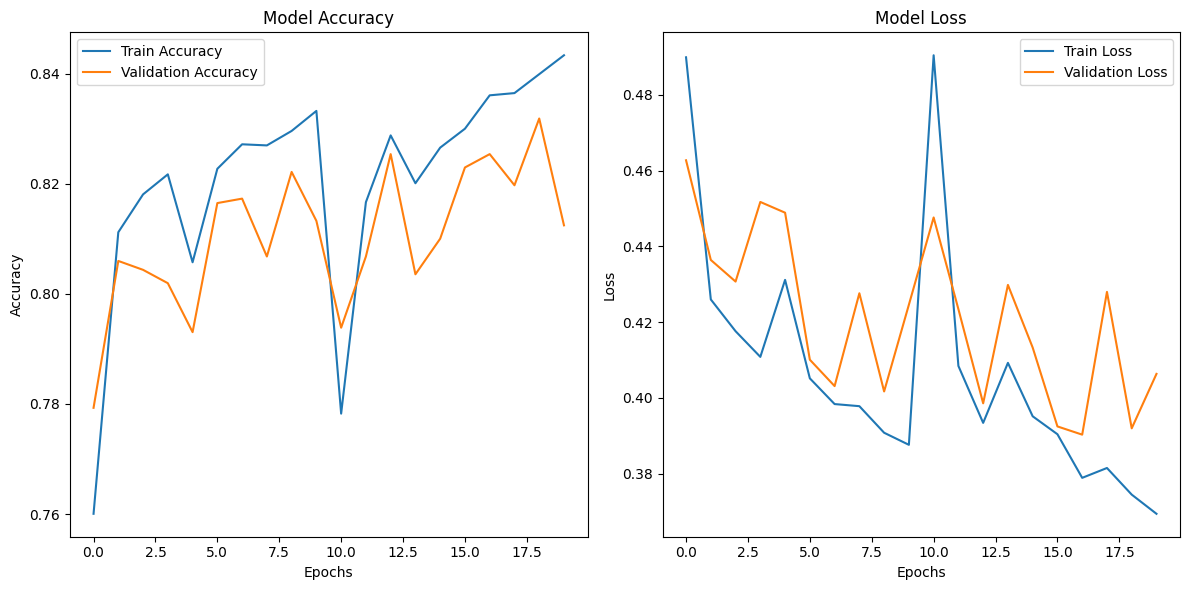

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Load the dataset
file_path = 'merged_tensors_with_labels.csv'  # Update the path as needed
df = pd.read_csv(file_path)

# Preprocess the data
X = df.iloc[:, :-1].values  # Features are all columns except the last one (BERT-encoded vectors)
y = df['is_depression'].values  # Labels (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix for the test set
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Depression', 'Depression'], yticklabels=['Non-Depression', 'Depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optional: Plot training history (accuracy and loss curves)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



---



# **RANDOM FOREST**

Test Accuracy: 0.8895
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       783
           1       0.93      0.84      0.88       764

    accuracy                           0.89      1547
   macro avg       0.89      0.89      0.89      1547
weighted avg       0.89      0.89      0.89      1547



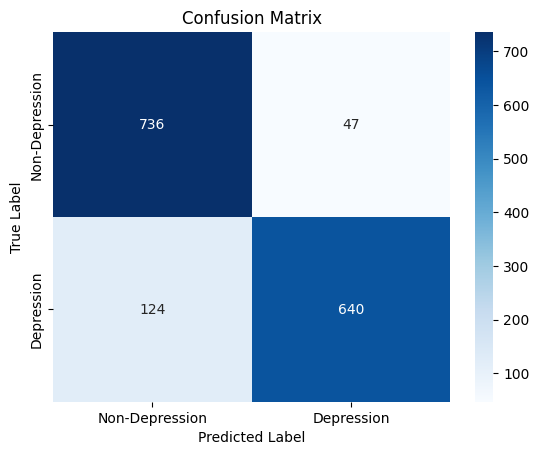

AUC: 0.9495588520457631


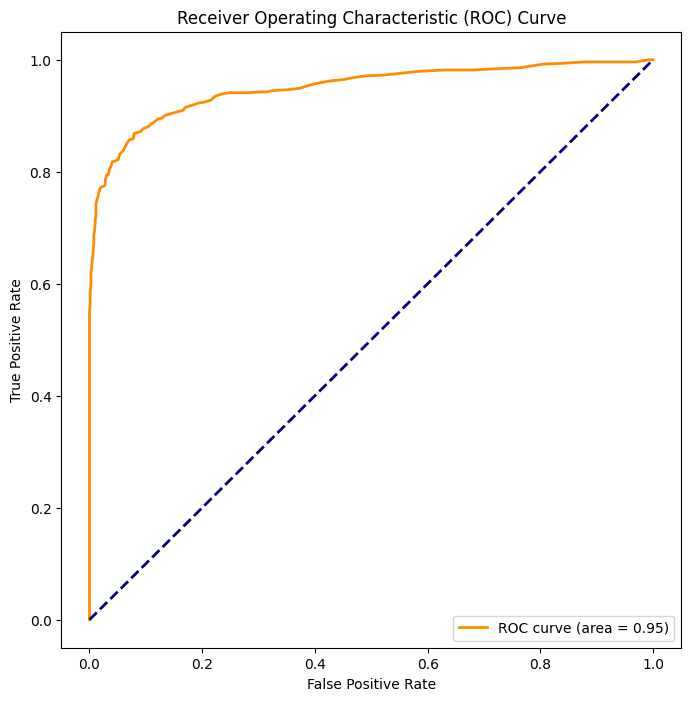

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'merged_tensors_with_labels.csv'  # Update the path as needed
df = pd.read_csv(file_path)

# Preprocess the data
X = df.iloc[:, :-1].values  # Features are all columns except the last one (BERT-encoded vectors)
y = df['is_depression'].values  # Labels (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix for the test set
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Depression', 'Depression'], yticklabels=['Non-Depression', 'Depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Support Vector Machine (SVM)**

Test Accuracy: 0.9147
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       783
           1       0.97      0.86      0.91       764

    accuracy                           0.91      1547
   macro avg       0.92      0.91      0.91      1547
weighted avg       0.92      0.91      0.91      1547



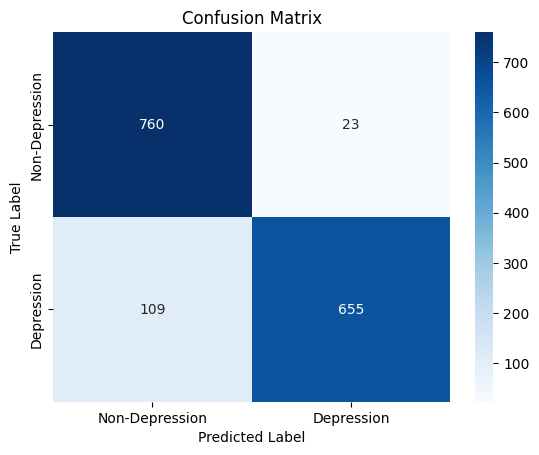

AUC: 0.9691589269356015


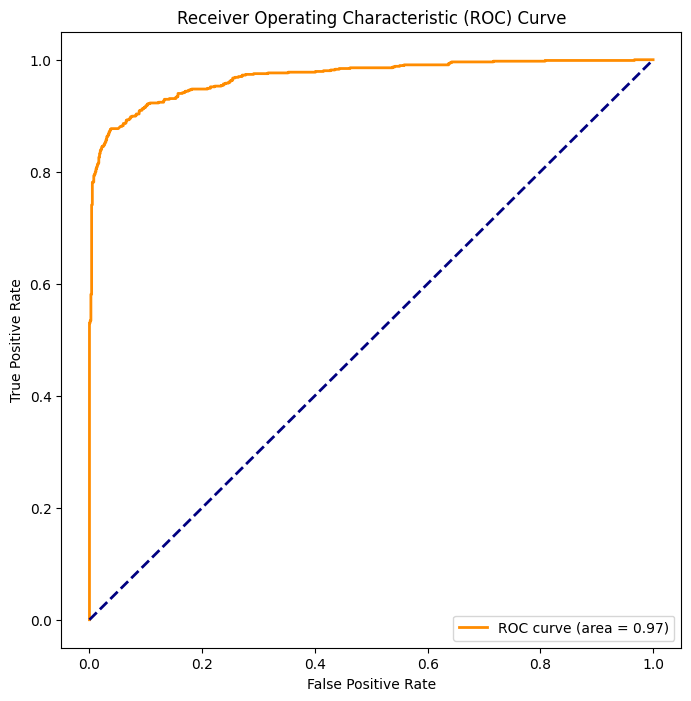

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'merged_tensors_with_labels.csv'  # Update the path as needed
df = pd.read_csv(file_path)

# Preprocess the data
X = df.iloc[:, :-1].values  # Features are all columns except the last one (BERT-encoded vectors)
y = df['is_depression'].values  # Labels (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model (using Radial Basis Function (RBF) kernel)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix for the test set
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Depression', 'Depression'], yticklabels=['Non-Depression', 'Depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **1D CNN**

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Validation Accuracy: 0.9082094430923462
Validation Accuracy: 0.9179056286811829
Validation Accuracy: 0.9256625771522522
Validation Accuracy: 0.9043309688568115
Validation Accuracy: 0.924369752407074
Validation Accuracy: 0.9095022678375244
Validation Accuracy: 0.9088558554649353
Validation Accuracy: 0.9237233400344849
Validation Accuracy: 0.9172592163085938
Validation Accuracy: 0.9204912781715393
100%|██████████| 10/10 [02:34<00:00, 15.46s/trial, best loss: -0.9256625771522522]
Best Hyperparameters: {'batch_size': 16, 'dense_units': 192, 'dropout': 0.13725646162010943, 'filters': 128, 'kernel_size': 4, 'learning_rate': 0.007645870327321409, 'pool_size': 3}
Epoch 1/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7611 - loss: 1.3442 - val_accuracy: 0.8674 - val_loss: 0.2794
Epoch 2/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8867 - loss: 0.2802 - val_accuracy: 0.8480 - val_loss: 0.3657
Epoch 3/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8928 - loss: 

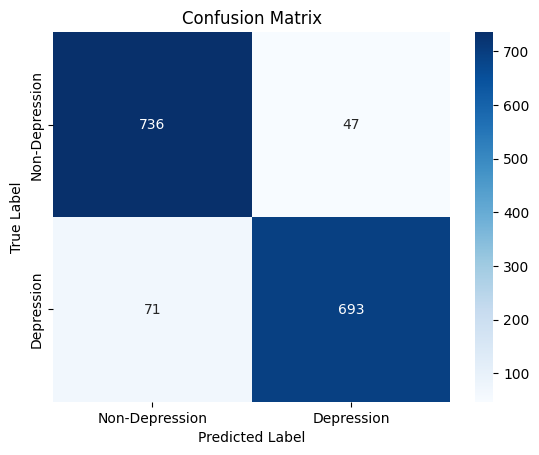

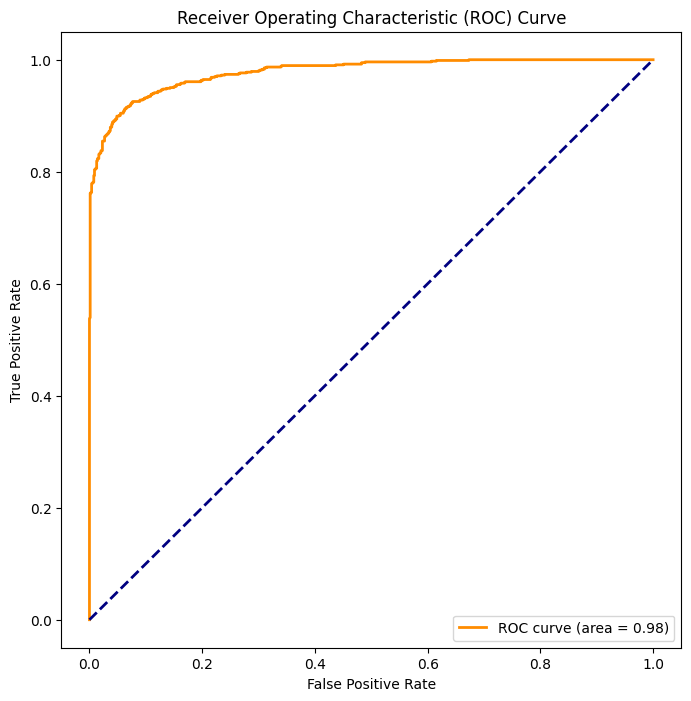

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

# Load the dataset
file_path = "merged_tensors_with_labels.csv"
df = pd.read_csv(file_path)

# Preprocess the data
X = df.iloc[:, :-1].values  # Features (encoded vectors from BERT)
y = df['is_depression'].values  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input for 1D CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Hyperparameter space for tuning
space = {
    'filters': hp.choice('filters', [32, 64, 128]),
    'kernel_size': hp.quniform('kernel_size', 3, 9, 2),
    'pool_size': hp.quniform('pool_size', 2, 4, 1),
    'dense_units': hp.quniform('dense_units', 64, 256, 32),
    'dropout': hp.uniform('dropout', 0.1, 0.5),
    'batch_size': hp.choice('batch_size', [16, 32, 64]),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-2))
}

# Model creation function for tuning
def create_and_evaluate(params):
    model = Sequential()
    model.add(Conv1D(
        filters=int(params['filters']),
        kernel_size=int(params['kernel_size']),
        activation='relu',
        input_shape=(X_train.shape[1], 1)
    ))
    model.add(MaxPooling1D(pool_size=int(params['pool_size'])))
    model.add(Flatten())
    model.add(Dense(int(params['dense_units']), activation='relu'))
    model.add(Dropout(params['dropout']))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=params['learning_rate']), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=int(params['batch_size']),
        verbose=0,
        validation_split=0.2
    )

    val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Validation Accuracy: {val_accuracy}")
    return {'loss': -val_accuracy, 'status': STATUS_OK}

# Bayesian Optimization
trials = Trials()
best_params = fmin(
    fn=create_and_evaluate,
    space=space,
    algo=tpe.suggest,
    max_evals=10,
    trials=trials
)

# Extract best hyperparameters
best_params['kernel_size'] = int(best_params['kernel_size'])
best_params['pool_size'] = int(best_params['pool_size'])
best_params['dense_units'] = int(best_params['dense_units'])
best_params['batch_size'] = [16, 32, 64][best_params['batch_size']]
best_params['filters'] = [32, 64, 128][best_params['filters']]
print(f"Best Hyperparameters: {best_params}")

# Final Model Training with Best Parameters
final_model = Sequential()
final_model.add(Conv1D(
    filters=best_params['filters'],
    kernel_size=best_params['kernel_size'],
    activation='relu',
    input_shape=(X_train.shape[1], 1)
))
final_model.add(MaxPooling1D(pool_size=best_params['pool_size']))
final_model.add(Flatten())
final_model.add(Dense(best_params['dense_units'], activation='relu'))
final_model.add(Dropout(best_params['dropout']))
final_model.add(Dense(1, activation='sigmoid'))

final_model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='binary_crossentropy', metrics=['accuracy'])

history = final_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=best_params['batch_size'],
    validation_split=0.2
)

# Evaluate on Test Set
loss, accuracy = final_model.evaluate(X_test, y_test)
print(f"Final Test Loss: {loss:.4f}, Final Test Accuracy: {accuracy:.4f}")

# Predictions and Metrics
y_pred_prob = final_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Depression', 'Depression'], yticklabels=['Non-Depression', 'Depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()